<a href="https://colab.research.google.com/github/nickpittman/In-Class-Labs/blob/main/9_21_In_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graphs! 
Let's take a look at how to plot data in a iPython Notebook:

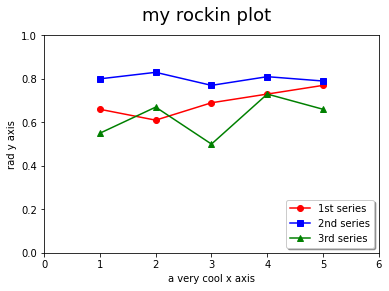

In [1]:
import matplotlib.pyplot as plt

#lets start by making up some data
xvals = [1,2,3,4,5]
series1 = [.66,.61,.69,.73,.77]
series2 = [.8,.83,.77,.81,.79]
series3 = [.55,.67,.5,.73,.66]

#add names for the graph and axes
plt.suptitle('my rockin plot',fontsize=18)
plt.xlabel('a very cool x axis')
plt.ylabel('rad y axis')

#and plot our series
plt.plot(xvals,series1,'ro-',label='1st series')
plt.plot(xvals,series2,'bs-',label='2nd series')
plt.plot(xvals,series3,'g^-',label='3rd series')

# add a key and set the values for your axis (plt.axis[x_min, x_max, y_min, y_max])
plt.legend(loc='lower right', shadow=True)
plt.axis([0, 6, 0, 1])
plt.show()

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


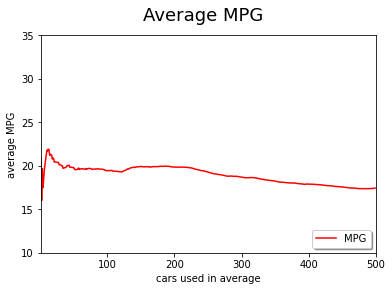

In [2]:
#Now, let's plot something about our data.
import pandas
import numpy
from google.colab import drive
drive.mount('/content/drive')

#load in the data
data = pandas.read_csv('/content/drive/MyDrive/Datasets/vehicles.csv') #change this line to point to your data
pandas.set_option('display.max_columns', 100)

#work with a subset of the data
gas_vehicles = data[data["fuelType"] == "Regular"]

# a silly function that returns the average MPG for the first k cars in the dataframe
def getAverageMPG(data,k):
    return data["comb08"].iloc[0:k].mean()

number_of_points = 500

# populate the series list
series = []
for i in range(1,number_of_points):
    val = getAverageMPG(gas_vehicles,i)
    series.append(val)

# plot it!
xvals = range(1,number_of_points)
plt.suptitle('Average MPG',fontsize=18)
plt.xlabel('cars used in average')
plt.ylabel('average MPG')
plt.plot(xvals,series,'r-',label='MPG')
plt.legend(loc='lower right', shadow=True)

plt.axis([1, number_of_points, 10, 35])
plt.show()

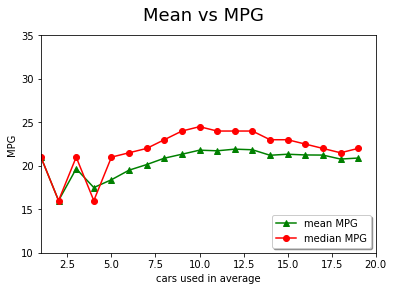

In [7]:
# exercise:
number_of_points = 20
def getMedianMPG(data,k):
  return data["comb08"].iloc[0:k].median()

mean_series = []
median_series = []
for i in range(1,number_of_points):
  val1 = getAverageMPG(gas_vehicles,i)
  val2 = getMedianMPG(gas_vehicles, i)
  mean_series.append(val1)
  median_series.append(val2)

# plot it!
xvals = range(1,number_of_points)
plt.suptitle('Mean vs MPG',fontsize=18)
plt.xlabel('cars used in average')
plt.ylabel('MPG')
plt.plot(xvals,mean_series,'g^-',label='mean MPG')
plt.plot(xvals,median_series,'ro-',label='median MPG')
plt.legend(loc='lower right', shadow=True)

plt.axis([1, number_of_points, 10, 35])
plt.show()

# Metrics and Testing
Let's use the iris dataset and see how accurate our kNN model is.

In [9]:
data = pandas.read_csv('/content/drive/MyDrive/Datasets/irisData.csv') #change this line to point to your data
#shuffle the data - "sampling" the full set in random order
shuffled_data = data.sample(frac=1, random_state=41)

#use the first 20 rows in the shuffled set as testing data #train with the rest
test_data = shuffled_data.iloc[0:20]
train_data = shuffled_data.iloc[20:]

In [10]:
def classify_kNN(new_example,train_data,k):
    #getting a copy of the training set just so we don't
    #mess up the original
    train_data_copy = train_data.copy()
    train_data_copy['distance_to_new'] = numpy.sqrt(
        (new_example['petal length']-train_data_copy['petal length'])**2
        +(new_example['sepal length']-train_data_copy['sepal length'])**2
        +(new_example['petal width']-train_data_copy['petal width'])**2
        +(new_example['sepal width']-train_data_copy['sepal width'])**2)
    
    sorted_data = train_data_copy.sort_values(['distance_to_new'])
    #mode to get most common thing in the first k examples in the sorted dataframe
    #iloc to get the actual string, mode will return the string inside of a pandas Series
    prediction = sorted_data.iloc[0:k]['species'].mode().iloc[0] 
    return prediction

In [11]:
def accuracy(actual,predicted):
    #get the series comparing the two series
    compared = actual == predicted
    correct_predictions = compared[ compared == True ]
    num_correct = len(correct_predictions)
    frac_correct = num_correct/len(actual)
    return frac_correct

In [12]:
def classify_all_kNN(test_data,train_data,k):
    #apply the classify_kNN function to each item in the test data with the train
    #data and k passed as the other two arguments. The result will be a series of 
    #the individual results.
    return test_data.apply(classify_kNN,args=(train_data,k),axis=1)

In [16]:
predictions5NN = classify_all_kNN(test_data,train_data,5)
print('ACTUAL\t\tPREDICTIONS')
for i in range(20):
    print(test_data['species'].iloc[i], "\t", predictions5NN.iloc[i] )

acc = accuracy(test_data['species'],predictions5NN)
print("accuracy:", acc)

ACTUAL		PREDICTIONS
Iris-virginica 	 Iris-virginica
Iris-virginica 	 Iris-virginica
Iris-virginica 	 Iris-virginica
Iris-versicolor 	 Iris-versicolor
Iris-virginica 	 Iris-virginica
Iris-versicolor 	 Iris-versicolor
Iris-virginica 	 Iris-virginica
Iris-versicolor 	 Iris-versicolor
Iris-virginica 	 Iris-virginica
Iris-virginica 	 Iris-virginica
Iris-virginica 	 Iris-virginica
Iris-setosa 	 Iris-setosa
Iris-setosa 	 Iris-setosa
Iris-versicolor 	 Iris-versicolor
Iris-setosa 	 Iris-setosa
Iris-virginica 	 Iris-versicolor
Iris-setosa 	 Iris-setosa
Iris-versicolor 	 Iris-virginica
Iris-setosa 	 Iris-setosa
Iris-setosa 	 Iris-setosa
accuracy: 0.9


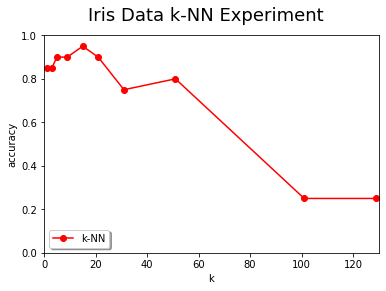

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

#reload the data
data = pandas.read_csv('/content/drive/MyDrive/Datasets/irisData.csv')

shuffled_data = data.sample(frac=1, random_state = 41)

test_data = shuffled_data.iloc[0:20]
train_data = shuffled_data.iloc[20:]


k_vals = [1,3,5,9,15,21,31,51,101,129]
kNN_accuracies = []

for k in k_vals:
    predictions = classify_all_kNN(test_data,train_data,k)
    current_accuracy = accuracy(test_data['species'],predictions)
    kNN_accuracies.append(current_accuracy)


plt.suptitle('Iris Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_vals,kNN_accuracies,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,130,0,1])

plt.show()